<div style="display: flex; align-items: center; justify-content: center; gap: 20px;">
  <!-- Left Column: Image -->
  <div style="flex: 1; text-align: center;">
    <img src="https://i0.wp.com/cdcs.web.ua.pt/wp-content/uploads/2022/05/cropped-cropped-Picture13-1.png?w=968" width="370" height="200" style="display: block; margin: auto;"/>
  </div>

  <!-- Right Column: Text -->
  <div style="flex: 1; text-align: left;">
    <div><strong style="color: #4F5B63; font-size: 1.5em;">Master in Data Science for Social Sciences</strong></div>
    <div><strong style="color: #4F5B63; font-size: 1.2em;">University of Aveiro</strong></div>
    <p style="color: #46627F; font-weight: bold; font-style: italic;">Introduction to Data Science - 2024/2025</p>
    <p style="color: #4F5B63;"></p>
    <p style="color: #4F5B63;"></p>
  </div>
</div>

<div style="display: flex; justify-content: space-around; align-items: flex-start;">
  <div style="width: 100%; padding: 10px; box-shadow: 0 2px 4px rgba(0,0,0,0.1); margin: 10px;">
    <h1 style="text-align: center; font-size: 2em; color: #46627F; margin-top: 0; margin-bottom: 0; line-height: 1;"> O Papel da Ciência de Dados nos Avanços dos Cuidados de Saúde
    </h1>
    <h2 style="text-align: center; color: #B1C0CF; margin-top: 0; margin-bottom: 0; line-height: 1;">
      -Notebook Análise de Conteúdo -
    </h2>
  </div>
</div>

<h1> Parte III: Análise de Conteúdo </h1>

In [5]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import time
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px

ModuleNotFoundError: No module named 'wordcloud'

## Leitura dos dados

In [32]:
df= pd.read_csv("scopus (6).csv")

In [33]:
#df.head
#df.info
#df.describe

## 1. Data Cleaning:
Processo onde se recorre à remoção de missing values ou duplicados, ou informação que não é relevante para o nosso trabalho. Nesta etapa vamos ver quantos missings, duplicados e padronização do texto.

In [34]:
# 1.1 Verificar estatísticas descritivas dos dados
print("Descrição dos dados:\n", df.describe(include='all').T)

# 1.2 Verificar valores duplicados
duplicated_count = df.duplicated().sum()
print(f"Total de entradas duplicadas: {duplicated_count}")

# 1.3 Verificar valores ausentes por coluna
missing_values = df.isna().sum()
print("Valores ausentes por coluna:\n", missing_values)

# 1.4 Preencher valores ausentes com strings vazias (se for texto)
df.fillna("", inplace=True)  # Ajuste conforme necessário

Descrição dos dados:
                                 count unique  \
Authors                          9263   9143   
Author full names                9263   9151   
Author(s) ID                     9263   9131   
Title                            9341   9310   
Year                           9341.0    NaN   
Source title                     9341   3230   
Volume                           7489    829   
Issue                            4883    151   
Art. No.                         3310   2907   
Page start                       5618   2205   
Page end                         5535   2229   
Page count                     5573.0    NaN   
Cited by                       9341.0    NaN   
DOI                              9029   9026   
Link                             9341   9341   
Affiliations                     9215   9141   
Authors with affiliations        9215   9191   
Abstract                         9341   8432   
Author Keywords                  7640   7612   
Index Keywords    

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_4336\1834719289.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("", inplace=True)  # Ajuste conforme necessário


In [35]:
# Checking for duplicate values
df.duplicated().sum()  #sem linhas duplicadas 

# Checking for missing values
df.isna().sum()        #sem valores ausentes

Authors                          0
Author full names                0
Author(s) ID                     0
Title                            0
Year                             0
Source title                     0
Volume                           0
Issue                            0
Art. No.                         0
Page start                       0
Page end                         0
Page count                       0
Cited by                         0
DOI                              0
Link                             0
Affiliations                     0
Authors with affiliations        0
Abstract                         0
Author Keywords                  0
Index Keywords                   0
Molecular Sequence Numbers       0
Chemicals/CAS                    0
Tradenames                       0
Manufacturers                    0
Funding Details                  0
Funding Texts                    0
References                       0
Correspondence Address           0
Editors             

In [36]:
# Get the number of duplicates
duplicate = int(df['Abstract'].duplicated().sum())
print(f'Número de duplicados: {duplicate}')

#demonstra que existe 909 resumos duplicados, possivel que os abstract se repita em diferentes artigos
#indica que ha varios artigos com o mesmo resumo??

Número de duplicados: 909


In [37]:
# Identificar os Abstracts duplicados
duplicated_abstracts = df[df['Abstract'].duplicated(keep=False)]  # keep=False mantém todas as duplicatas

# Ordenar pelo Abstract para facilitar a visualização
duplicated_abstracts_sorted = duplicated_abstracts.sort_values(by='Abstract')

# Exibir os artigos com Abstracts duplicados
duplicated_abstracts_sorted


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
5373,,,,Expression of Concern: Cardiovascular Disease ...,2022,2022 International Conference on 4th Industria...,,,,,...,979-835034591-9,,,English,Int. Conf. Ind. Revolut. Based Technol. Pract....,Erratum,Final,,Scopus,2-s2.0-85206239546
5372,Alapati N.; Prasad B.V.V.S.; Sharma A.; Kumari...,"Alapati, Naresh (57212272113); Prasad, B.V.V.S...",57212272113; 57200544327; 57215335789; 5814862...,Cardiovascular Disease Prediction using machin...,2022,2022 International Conference on 4th Industria...,,,,60,...,979-835034591-9,,,English,Int. Conf. Ind. Revolut. Based Technol. Pract....,Conference paper,Final,,Scopus,2-s2.0-85150420710
6460,Krishnapraseeda V.; Geetha Devasena M.S.; Venk...,"Krishnapraseeda, V. (57224618128); Geetha Deva...",57224618128; 55217797900; 57201729642; 5719075...,Predictive Analytics on Diabetes Data using Ma...,2021,2021 7th International Conference on Advanced ...,,,9441972,1670,...,978-166540520-1,,,English,"Int. Conf. Adv. Comput. Commun. Syst., ICACCS",Conference paper,Final,,Scopus,2-s2.0-85108027730
6426,,,,Expression of Concern: Predictive Analytics on...,2021,2021 7th International Conference on Advanced ...,,,,,...,978-166540520-1,,,English,"Int. Conf. Adv. Comput. Commun. Syst., ICACCS",Erratum,Final,,Scopus,2-s2.0-85207835113
3467,Jaisudha J.; Dhabliya D.; Narasimhayya B.E.; S...,"Jaisudha, J. (58837877000); Dhabliya, Dharmesh...",58837877000; 57222241738; 58136409200; 5720960...,Implementing Machine Learning Techniques to En...,2023,2023 3rd International Conference on Smart Gen...,,,,,...,979-835031912-5,,,English,"Int. Conf. Smart Gener. Comput., Commun. Netw....",Conference paper,Final,,Scopus,2-s2.0-85187574806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,Hueso M.; Rotllan N.; Escolà-Gil J.C.; Vellido A.,"Hueso, Miguel (6602166995); Rotllan, Noemí (97...",6602166995; 9735359100; 57193800525; 6602481203,Editorial: Systems biology and data-driven mac...,2023,Frontiers in Cardiovascular Medicine,10,,1320110,,...,,,,English,Front. Cardiovasc. Med.,Editorial,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85176388555
3770,Chu Y.-W.; Chang C.-C.,"Chu, Yen-Wei (52563464300); Chang, Chi-Chang (...",52563464300; 16229696900,Editorial: Using physical & genomics markers f...,2023,Frontiers in Genetics,14,,1336399,,...,,,,English,Front. Genet.,Editorial,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85179373842
3776,Hamid A.R.A.H.; Rusdhy F.S.A.; Yusuf P.A.,"Hamid, Agus Rizal Ardy Hariandy (57202054669);...",57202054669; 58667339900; 57192156597,Metaverse in medical education,2023,Medical Journal of Indonesia,32,2,,67,...,,,,English,Med. J. Indonesia,Note,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85175064939
3252,Gupta L.; Krusche M.; Venerito V.; Hügle T.,"Gupta, Latika (57202665604); Krusche, Martin (...",57202665604; 57204734464; 57189029364; 6506102949,Harnessing the potential of digital rheumatology,2023,Health Policy and Technology,12,1,100730,,...,,,,English,Health Policy Technol.,Editorial,Final,All Open Access; Bronze Open Access,Scopus,2-s2.0-85149967931


In [38]:
# Remove duplicate rows
df = df.drop_duplicates(subset=['Abstract'])
df.shape

#Remove as duplicatas, mantendo apenas a primeira ocorrência de cada resumo.
# após a remoção das duplicados, restaram 8432 linhas e 46 colunas.

(8432, 46)

## 2. Text Preprocessing:

Aqui o objetivo é preparar o texto (dados em bruto) para a análise de conteúdo, pode incluir tarefas como: remoção de stopwords, tokenização (quebra do texto em palavras), normalização de texto, remoção de pontuações ou caracteres especiais, conversao para letras minúsculas, lematização (reduzir a palavra à sua forma base), stemming (reduzi palavras a sua forma canónica)

In [39]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
import contractions

# Baixar pacotes necessários do NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utilizador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utilizador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utilizador\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
def clean_text(text_string, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''):
    # Limpar URLs
    string = re.sub(r'https?://\S+|www\.\S+', '', text_string)

    # Limpar HTML elements
    string = re.sub(r'<.*?>', '', string)

    # Remoção de pontuações
    string = re.sub(r'[^\w\s]', '', string)

    # Converter texto em minúsculas
    string = string.lower()

    # Remover stop words (usando stopwords do NLTK)
    filtered_words = [word for word in string.split() if word not in stopwords.words('english')]

    # Lista de stop words customizada
    customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
                  "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                  "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                  "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'use']

    # Aplicar stop words customizadas
    final_words = list(set(filtered_words) - set(customlist))

    # Tokenização (Separar em palavras)
    tokens = re.findall(r'\b\w+\b', ' '.join(final_words))

    # Remover números
    tokens = [word for word in tokens if word.isalpha()]

    # Lemmatização
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

    # Corrigir contrações
    final_string = ' '.join([contractions.fix(word) for word in lemmatized_words])

    return final_string

In [41]:
example_text = "Visit https://example.com! This is an example: It's amazing, isn't it?"
cleaned_text = clean_text(example_text)
print(cleaned_text)

visit example is not amazing


In [42]:
df.loc[:, "Abstract"] = df["Abstract"].astype(str)
print(df["Abstract"].dtypes)

object


In [43]:
df_sample = df.head(100)
df_sample["clean_Abstract"] = df_sample["Abstract"].apply(clean_text)
print(df_sample[["Abstract", "clean_Abstract"]].head())

                                            Abstract  \
0  The convergence of Blockchain technology with ...   
1  Numerous cancer therapies have detrimental car...   
2  Artificial intelligence (AI) is revolutionizin...   
3  Objectives: This study aims to develop an inno...   
4                            [No abstract available]   

                                      clean_Abstract  
0  communication automating publishing training l...  
1  may author implementation practice complicatio...  
2  language making author significant practice we...  
3  making author setting training study labor opt...  
4                                 abstract available  


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_4336\1659168344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["clean_Abstract"] = df_sample["Abstract"].apply(clean_text)


In [44]:
df.loc[:, "clean_Abstract"] = df["Abstract"].apply(clean_text)

# Verificando os primeiros resultados
print(df[["Abstract", "clean_Abstract"]].head())

                                            Abstract  \
0  The convergence of Blockchain technology with ...   
1  Numerous cancer therapies have detrimental car...   
2  Artificial intelligence (AI) is revolutionizin...   
3  Objectives: This study aims to develop an inno...   
4                            [No abstract available]   

                                      clean_Abstract  
0  communication automating publishing training l...  
1  may author implementation practice complicatio...  
2  language making author significant practice we...  
3  making author setting training study labor opt...  
4                                 abstract available  


## 3. Contagem de termos mais frequentes:

In [46]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Juntar todos os abstracts limpos em uma única string
all_cleaned_text = ' '.join(df['clean_Abstract'])

# Tokenizar o texto
tokens = re.findall(r'\b\w+\b', all_cleaned_text)

# Contar a frequência das palavras
word_counts = Counter(tokens)

# Mostrar as 10 palavras mais comuns
most_common_words = word_counts.most_common(10)
print(most_common_words)

[('patient', 7060), ('learning', 5874), ('model', 5803), ('machine', 5646), ('data', 5588), ('method', 4519), ('study', 4286), ('healthcare', 3972), ('clinical', 3940), ('system', 3868)]


In [48]:
# Preparar para o gráfico de barras
words, counts = zip(*most_common_words)

# Salvar o gráfico como um arquivo
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('Top 10 Palavras Mais Frequentes nos Abstracts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Salvar como PNG
plt.savefig("top_10_palavras.png")

In [49]:
# Gerar a WordCloud a partir das frequências de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Exibir a WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove os eixos

# Salvar a WordCloud como um arquivo PNG
wordcloud.to_file("wordcloud.png")

In [50]:
#guardei  o df limpo para ser mais fácil em futuras utilizações
df.to_csv("df_limpo.csv", index=False)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Carregar o DataFrame limpo de volta
df = pd.read_csv("df_limpo.csv")
print(df["clean_Abstract"].head())

0    communication automating publishing training l...
1    may author implementation practice complicatio...
2    language making author significant practice we...
3    making author setting training study labor opt...
4                                   abstract available
Name: clean_Abstract, dtype: object


## 4.  Term Frequency- Inverse Document Frequency (TF-IDF):

In [3]:
# Inicializar o TfidfVectorizer (sem stop_words, pois você já fez a remoção)
vectorizer = TfidfVectorizer()

# Ajustar o modelo e transformar os dados
X = vectorizer.fit_transform(df['clean_Abstract'])  # Usando a coluna limpa do dataframe

# Verificar as palavras mais relevantes (termos mais frequentes)
feature_names = vectorizer.get_feature_names_out()
dense = X.todense()
denselist = dense.tolist()

# Convertendo em dataframe para visualização
df_tfidf = pd.DataFrame(denselist, columns=feature_names)

# Verificando as primeiras linhas do dataframe resultante
df_tfidf.head()

,aa,aaa,aaaneurysm,aac,aace,aachen,aacr,aad,aadat,aae,...,δmasynavg,δmmsep,δp,δr,δrsanitizer,δδg,μg,μm,μmaps,μmoll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Verificar a média de TF-IDF para cada palavra
average_tfidf = df_tfidf.mean(axis=0)

# Ordenar as palavras pelo TF-IDF médio e visualizar as mais relevantes
sorted_tfidf = average_tfidf.sort_values(ascending=False)

# Exibir as 10 palavras mais relevantes
print(sorted_tfidf.head(10))

# Obter as 10 palavras mais relevantes
top_10_avg_tfidf = sorted_tfidf.head(10)

# Salvar as 10 palavras mais relevantes em um arquivo CSV
top_10_avg_tfidf.to_csv("top_10_avg_tfidf_terms.csv", header=["Average TF-IDF"], index=True)

# Verificar se foi salvo corretamente
print("Arquivo CSV 'top_10_avg_tfidf_terms.csv' salvo com sucesso!")

patient       0.025866
model         0.024172
machine       0.020860
learning      0.020663
data          0.020104
method        0.019441
disease       0.019356
system        0.019044
study         0.018981
healthcare    0.018206
dtype: float64
Arquivo CSV 'top_10_avg_tfidf_terms.csv' salvo com sucesso!


## 5. LDA 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Criar o modelo de contagem de palavras
count_vectorizer = CountVectorizer(stop_words='english')
X_count = count_vectorizer.fit_transform(df['clean_Abstract'])

In [8]:
from sklearn.decomposition import LatentDirichletAllocation

# Definir o número de tópicos
n_topics = 10  # Você pode ajustar esse número conforme necessário

# Aplicar o modelo LDA
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X_count)

# Exibir as palavras mais relevantes para cada tópico
feature_names = count_vectorizer.get_feature_names_out()
n_words = 10  # Número de palavras a exibir por tópico

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]))

Topic #1:
patient treatment cancer approach study medicine clinical disease personalized analysis
Topic #2:
patient healthcare learning machine potential technology data challenge application treatment
Topic #3:
image imaging application field artificial intelligence medical deep learning review
Topic #4:
springer nature exclusive licence author medium sciencebusiness method llc alzheimers
Topic #5:
study intervention patient outcome method approach health result creative attribution
Topic #6:
patient health healthcare data care technology learning machine intelligence medical
Topic #7:
medicine data clinical disease precision approach learning machine research patient
Topic #8:
sensor device monitoring wearable internet iot thing technology activity smart
Topic #9:
model learning machine method data result accuracy algorithm using healthcare
Topic #10:
model patient method result study conclusion using clinical prediction machine


In [ ]:
# Criar um DataFrame para armazenar os resultados
topics = []
for topic_idx, topic in enumerate(lda.components_):
    topic_words = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
    topics.append(f"Topic #{topic_idx + 1}: " + ", ".join(topic_words))

df_topics = pd.DataFrame(topics, columns=["Top Words"])
df_topics.to_csv("topics_output.csv", index=False)

In [10]:
# Número de palavras a exibir por tópico
n_words = 10

# Criando uma lista para armazenar as palavras de cada tópico
topics = []

# Para cada tópico gerado pelo LDA
for topic_idx, topic in enumerate(lda.components_):
    topic_words = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
    topics.append(topic_words)

# Criar um DataFrame com os tópicos
df_topics = pd.DataFrame(topics, columns=[f"Word {i+1}" for i in range(n_words)])

# Salvar em um arquivo CSV (ou Excel)
df_topics.to_csv("lda_topics.csv", index=False)

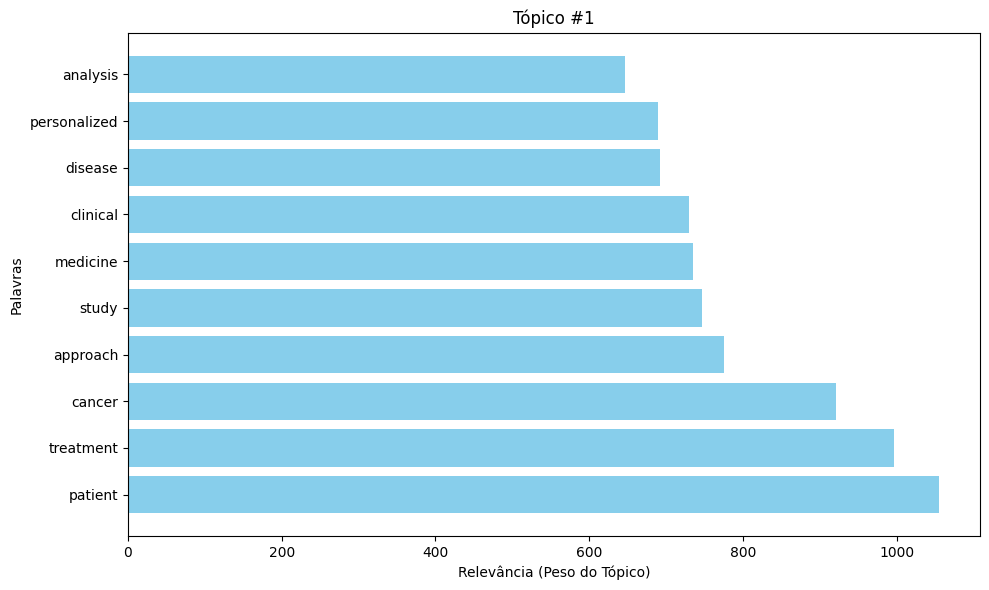

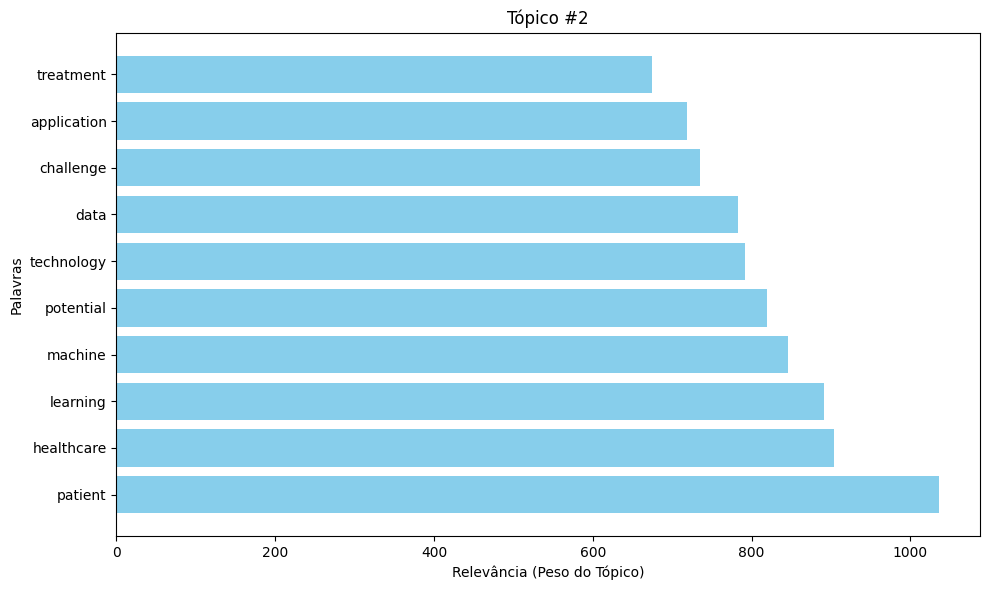

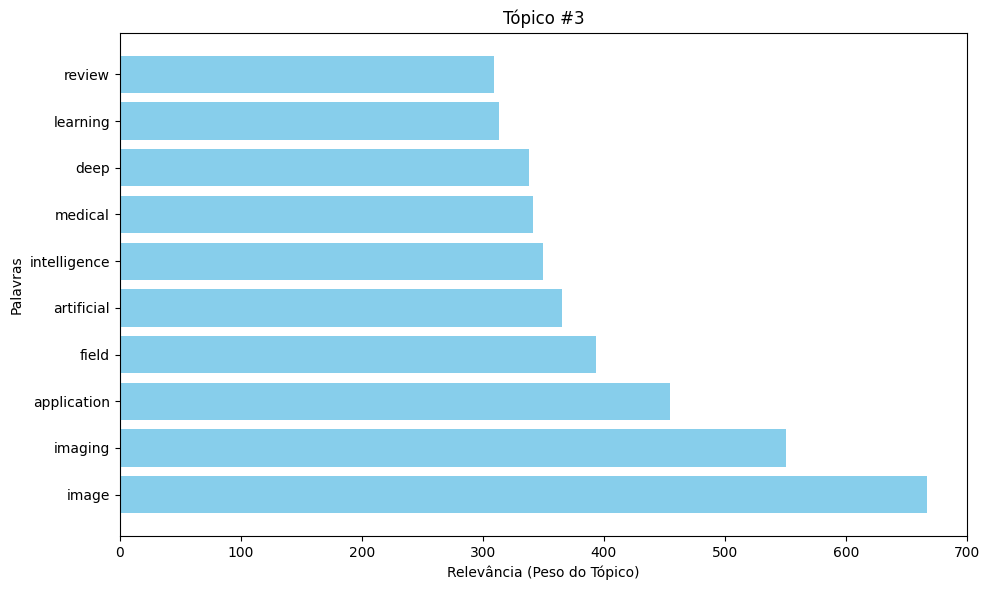

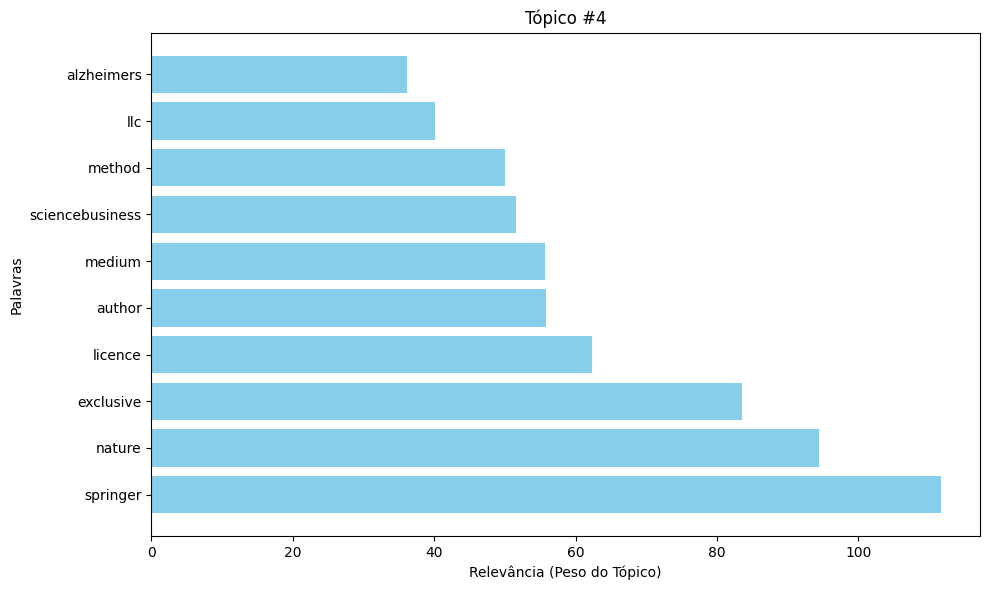

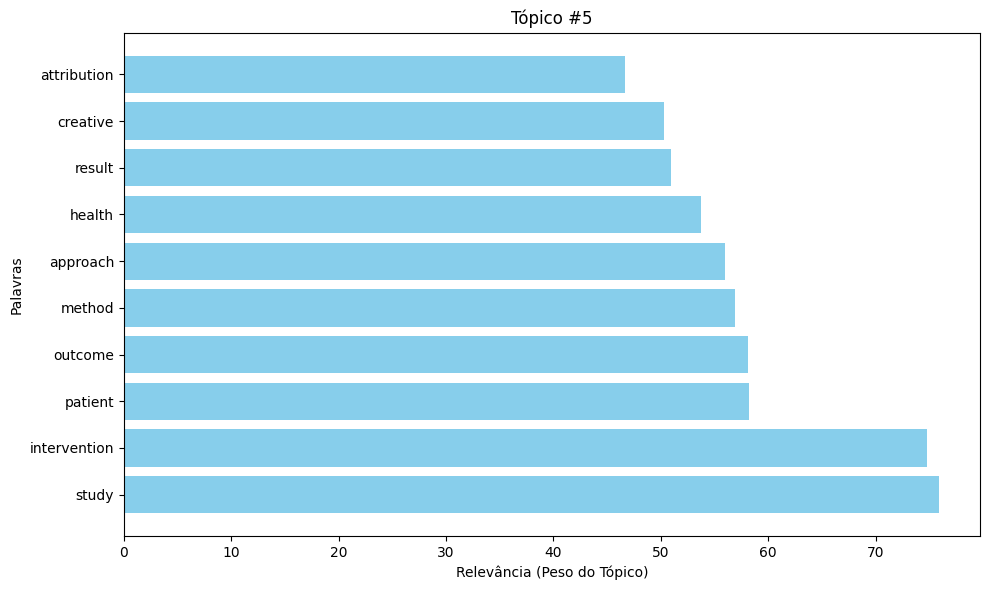

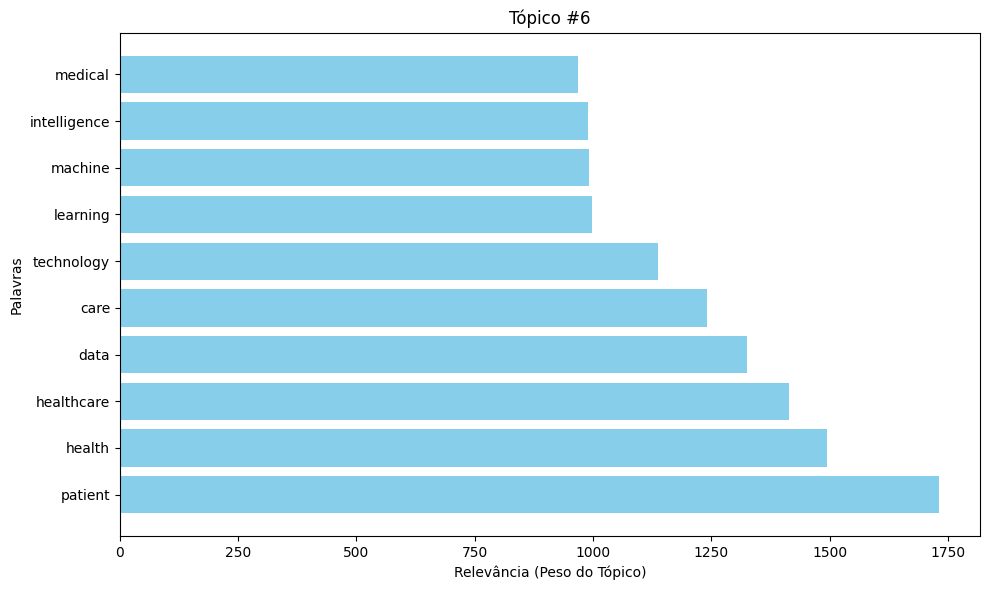

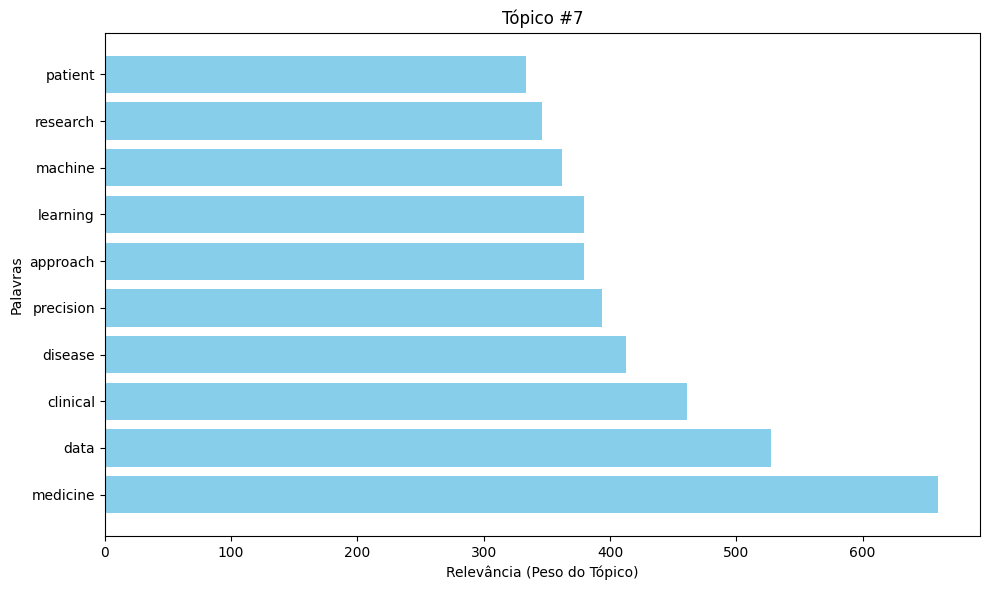

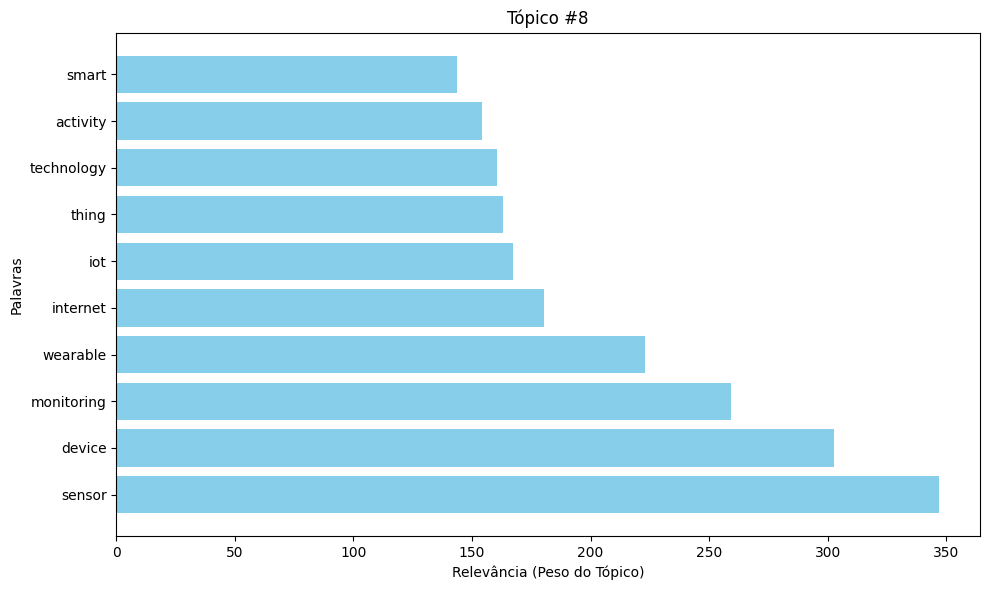

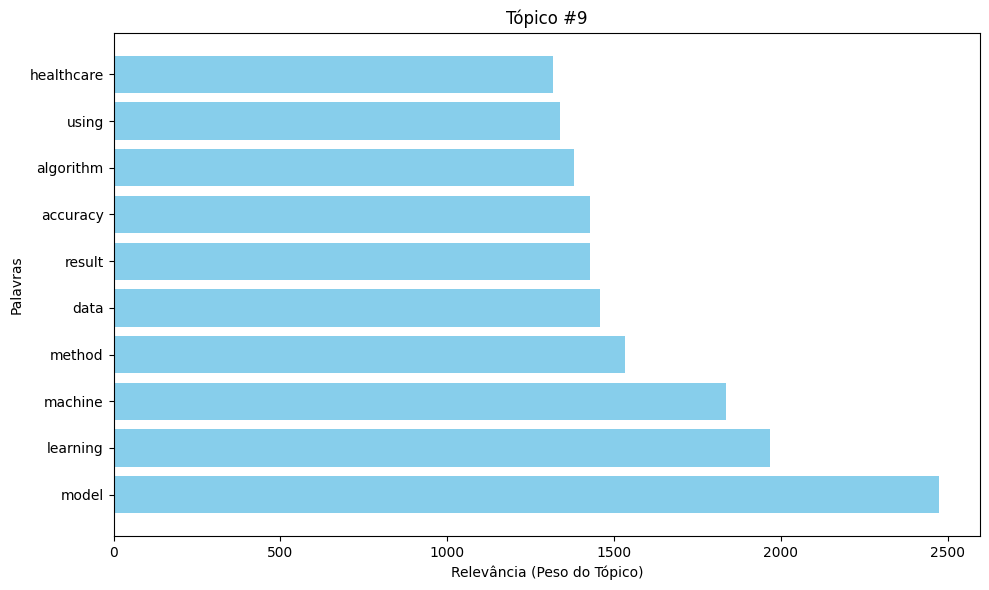

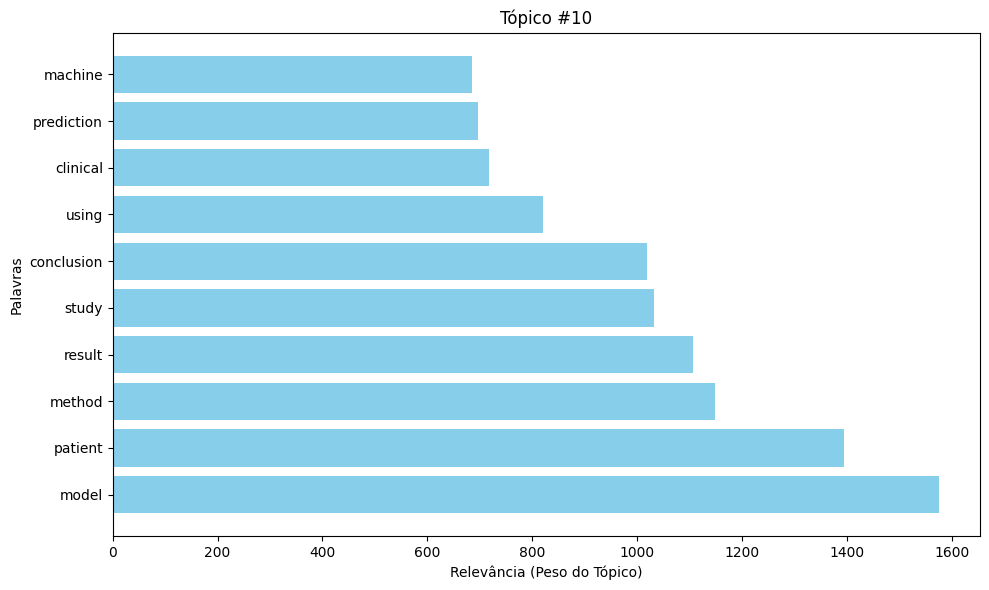

In [11]:
import matplotlib.pyplot as plt

# Número de palavras a exibir por tópico
n_words = 10

# Gerar gráfico de barras para cada tópico
for topic_idx, topic in enumerate(lda.components_):
    # Obter as palavras mais relevantes para o tópico
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_scores = [topic[i] for i in top_words_idx]

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_words_scores, color='skyblue')
    plt.xlabel('Relevância (Peso do Tópico)')
    plt.ylabel('Palavras')
    plt.title(f'Tópico #{topic_idx + 1}')
    plt.tight_layout()

    # Salvar o gráfico como PNG
    plt.savefig(f"topic_{topic_idx + 1}.png")